In [1]:
RESULTS_CSV = "/home/admin/FEUP-Synthesizing-Audio-from-Textual-Input/data/working/stats/training_stats_1691249628.8803675.csv"

In [2]:
# load csv into pandas dataframe
import pandas as pd

In [12]:
df = pd.read_csv(RESULTS_CSV)
df = df.set_index('Iteration')
df

,Epoch,Loss_D,Loss_G,D(x),D(G(z1)),D(G(z2)),Elapsed Time,Time Left (Epoch),Time Left (Total)
Iteration,,,,,,,,,
1,1,1.276752,0.752146,0.530376,0.473940,0.471444,00:00:23,04:47:04,23:56:57
2,1,1.335798,0.697643,0.527238,0.500591,0.498253,00:00:35,03:32:25,17:44:29
3,1,1.341693,0.695832,0.524097,0.500982,0.498858,00:00:47,03:08:47,15:47:07
4,1,1.349749,0.695886,0.520875,0.501453,0.499237,00:00:58,02:55:05,14:39:19
5,1,1.283294,0.731637,0.536919,0.483561,0.481392,00:01:09,02:46:28,13:57:02
...,...,...,...,...,...,...,...,...,...
1824,3,1.071575,0.886087,0.583757,0.413331,0.412269,05:45:52,01:05:59,05:40:33
1825,3,1.062210,0.886714,0.588958,0.413046,0.412008,05:46:03,01:05:47,05:40:22
1826,3,1.071445,0.886393,0.583700,0.413200,0.412140,05:46:14,01:05:36,05:40:10


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Create new column which is Index / 724 rounder to the below integer
df['Dec_Epoch'] = df.index
df['Dec_Epoch'] = df['Dec_Epoch'].apply(lambda x: x / 724)
print(df)

           Epoch    Loss_D    Loss_G      D(x)  D(G(z1))   D(G(z2))  \
Iteration                                                             
1              1  1.276752  0.752146  0.530376  0.473940   0.471444   
2              1  1.335798  0.697643  0.527238  0.500591   0.498253   
3              1  1.341693  0.695832  0.524097  0.500982   0.498858   
4              1  1.349749  0.695886  0.520875  0.501453   0.499237   
5              1  1.283294  0.731637  0.536919  0.483561   0.481392   
...          ...       ...       ...       ...       ...        ...   
1824           3  1.071575  0.886087  0.583757  0.413331   0.412269   
1825           3  1.062210  0.886714  0.588958  0.413046   0.412008   
1826           3  1.071445  0.886393  0.583700  0.413200   0.412140   
1827           3  1.080553  0.884493  0.579231  0.413954   0.412925   
1828           3  1.064721  0.883600  0.588785  0.414342   0.413299   

          Elapsed Time Time Left (Epoch) Time Left (Total)  Dec_Epoch  
Iter

This will give you a sense of how the discriminator and generator losses change over training epochs. It can help you identify convergence points, oscillations, and overall stability of the GAN training.


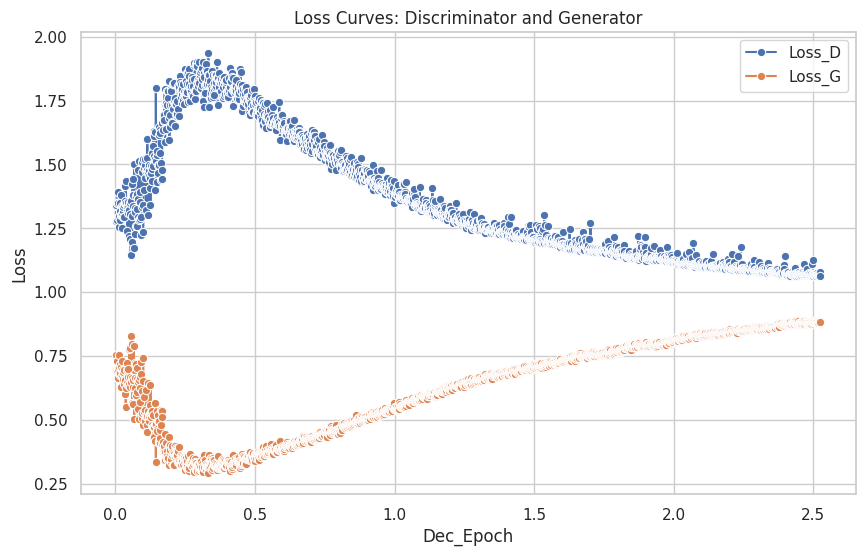

In [26]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create the Loss Curves plot
plt.figure(figsize=(10, 6))
plot = sns.lineplot(x='Dec_Epoch', y='Loss_D', data=df, marker='o', label='Loss_D')
sns.lineplot(x='Dec_Epoch', y='Loss_G', data=df, marker='o', label='Loss_G')

# Add labels and title
plt.xlabel('Dec_Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves: Discriminator and Generator')
plt.legend()

# Display the plot
print("This will give you a sense of how the discriminator and generator losses change over training epochs. It can help you identify convergence points, oscillations, and overall stability of the GAN training.")
plt.show()

Discriminator Outputs: Plot the Epoch against D(x) and D(G(z1)) or D(G(z2)). This can show you how well the discriminator is distinguishing between real and generated data. Over time, you should see D(x) decreasing and D(G(z1)) or D(G(z2)) increasing if the generator is improving.


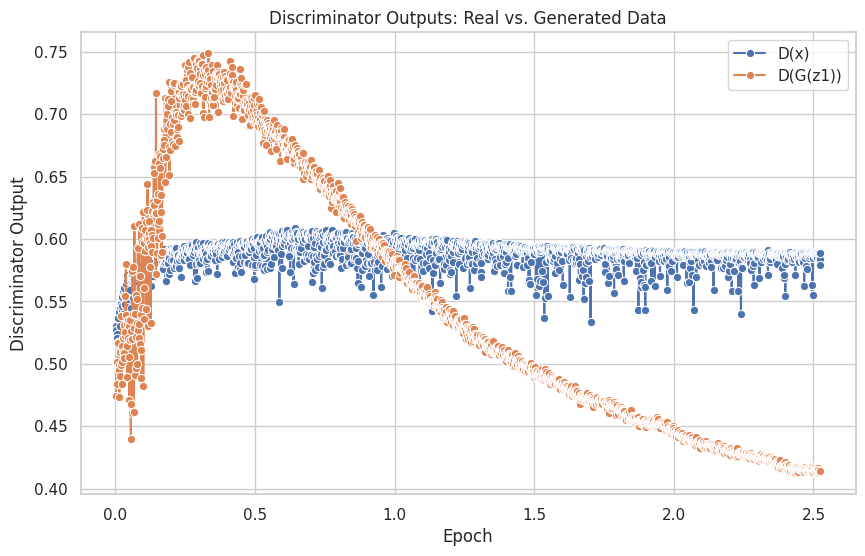

In [30]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create the Discriminator Outputs plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Dec_Epoch', y='D(x)', data=df, marker='o', label='D(x)')
sns.lineplot(x='Dec_Epoch', y='D(G(z1))', data=df, marker='o', label='D(G(z1))')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Discriminator Output')
plt.title('Discriminator Outputs: Real vs. Generated Data')
plt.legend()

# Display the plot
print("Discriminator Outputs: Plot the Epoch against D(x) and D(G(z1)) or D(G(z2)). This can show you how well the discriminator is distinguishing between real and generated data. Over time, you should see D(x) decreasing and D(G(z1)) or D(G(z2)) increasing if the generator is improving.")
plt.show()

This plot shows the ratio of Loss_G to Loss_D over training epochs. Fluctuations or sudden changes in the ratio could indicate instability in the training process.


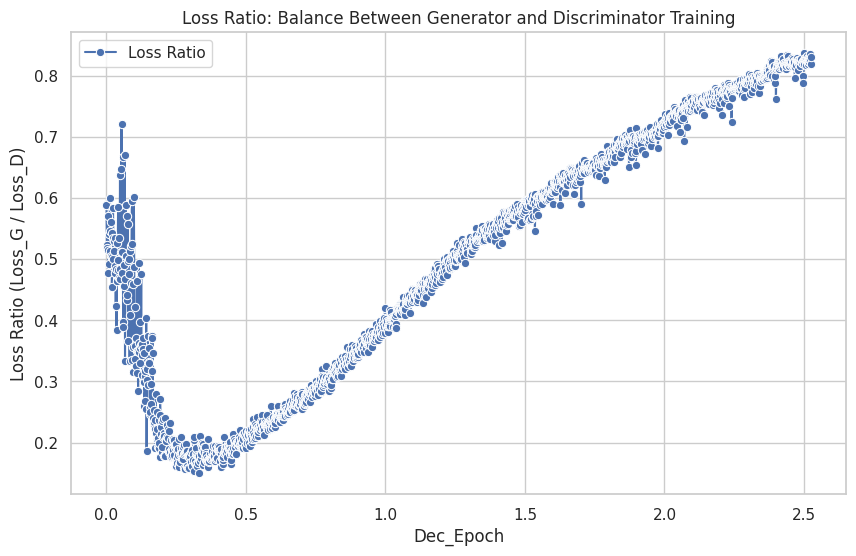

In [32]:
# Set Seaborn style
sns.set(style="whitegrid")

# Calculate the loss ratio
df['Loss_Ratio'] = df['Loss_G'] / df['Loss_D']

# Create the Loss Ratio plot
plt.figure(figsize=(10, 6))
plot = sns.lineplot(x='Dec_Epoch', y='Loss_Ratio', data=df, marker='o', label='Loss Ratio')

# Add labels and title
plt.xlabel('Dec_Epoch')
plt.ylabel('Loss Ratio (Loss_G / Loss_D)')
plt.title('Loss Ratio: Balance Between Generator and Discriminator Training')
plt.legend()

# Display the plot
print("This plot shows the ratio of Loss_G to Loss_D over training epochs. Fluctuations or sudden changes in the ratio could indicate instability in the training process.")
plt.show()


These scatter plots show the relationship between Loss_D and Loss_G for each epoch. Patterns such as trade-offs or correlations might be observed.


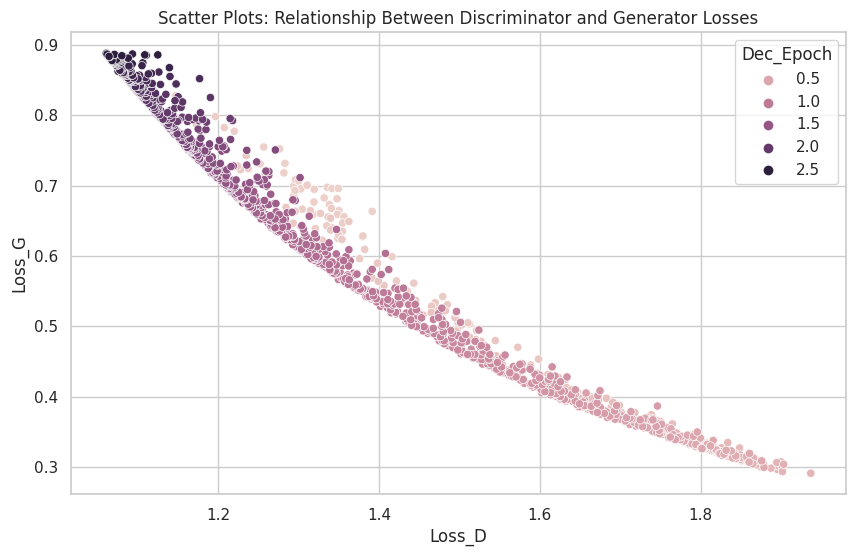

In [33]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create the Scatter Plots
plt.figure(figsize=(10, 6))
plot = sns.scatterplot(x='Loss_D', y='Loss_G', data=df, hue='Dec_Epoch')

# Add labels and title
plt.xlabel('Loss_D')
plt.ylabel('Loss_G')
plt.title('Scatter Plots: Relationship Between Discriminator and Generator Losses')
plt.legend(title='Dec_Epoch')

# Display the plot
print("These scatter plots show the relationship between Loss_D and Loss_G for each epoch. Patterns such as trade-offs or correlations might be observed.")
plt.show()
